In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
housing_data = pd.read_csv('House_data 2.csv')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
# modify date format so it is readable
date_formatted = pd.to_datetime(housing_data['date'], format='%Y%m%dT%H%M%S')
housing_data['date'] = date_formatted
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

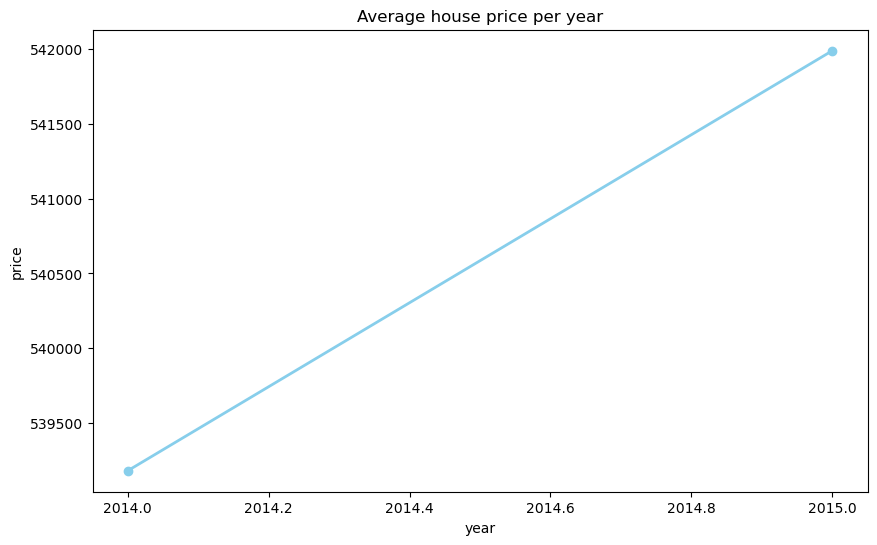

In [13]:
# Date-based analysis
# line plot to show average price over time
# convert the data to year for grouping
housing_data['year'] = housing_data['date'].dt.year
housing_data['month'] = housing_data['date'].dt.month
# convert the price data to int
housing_data['price'] = housing_data['price'].astype(int)
# average price per year
average_price_year = housing_data.groupby('year')['price'].mean()

# creating the line plot
plt.figure(figsize=(10,6))
plt.plot(average_price_year.index, average_price_year.values, marker = 'o', color = 'skyblue', linewidth = 2)

# set specific ticks on the x-axis
#plt.xticks([2014,2015], labels=['2014','2015'])

# adding title and lables
plt.title('Average house price per year')
plt.xlabel('year')
plt.ylabel('price')

plt.show()

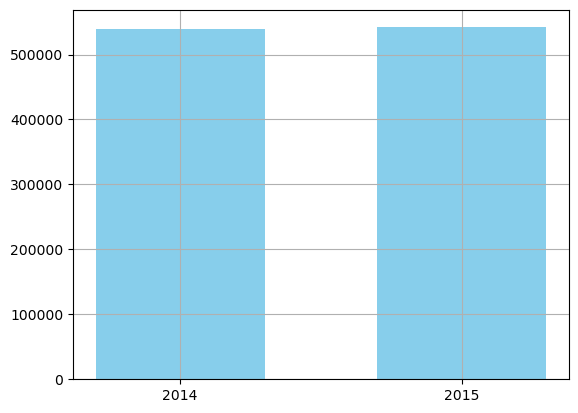

year
2014    539181.428415
2015    541988.992264
Name: price, dtype: float64

In [254]:
# bar plot
plt.bar(average_price_year.index, average_price_year.values, width =0.6, color = 'skyblue')
plt.xticks([2014,2015], labels=['2014','2015'])
plt.grid(True)
plt.show()
average_price_year

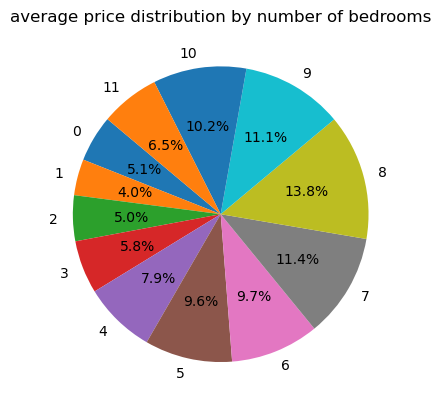

In [83]:
average_price_bedroom = housing_data.groupby('bedrooms')['price'].mean()
# labels make sure each slice is indentified
# autopct='%1.1f%%': Displays the percentage with one decimal place (e.g., 12.5%)
plt.pie(average_price_bedroom, labels= average_price_bedroom.index, autopct='%1.1f%%', startangle=140) 
plt.title('average price distribution by number of bedrooms')
plt.show()

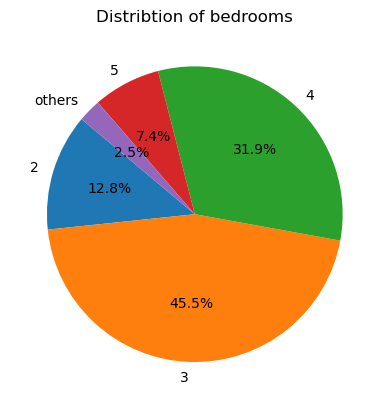

In [129]:
# Distribution of Bedrooms (Categories <5% combined as Others)
count_of_bedrooms = housing_data.groupby('bedrooms')['bedrooms'].count()
# Calculate the total count of all bedrooms
total_count = count_of_bedrooms.sum()
# Identify categories contributing less than 5% to the total count
threshold = 0.05 * total_count
small_categories = count_of_bedrooms[count_of_bedrooms < threshold]
# Create a new Series with combined 'Others' category for small contributions
count_of_bedrooms_filtered = count_of_bedrooms[count_of_bedrooms>=threshold]
count_of_bedrooms_filtered['others'] = small_categories.sum()

plt.pie(count_of_bedrooms_filtered, labels= count_of_bedrooms_filtered.index, autopct = '%1.1f%%', startangle= 140)
plt.title('Distribtion of bedrooms')
plt.show()

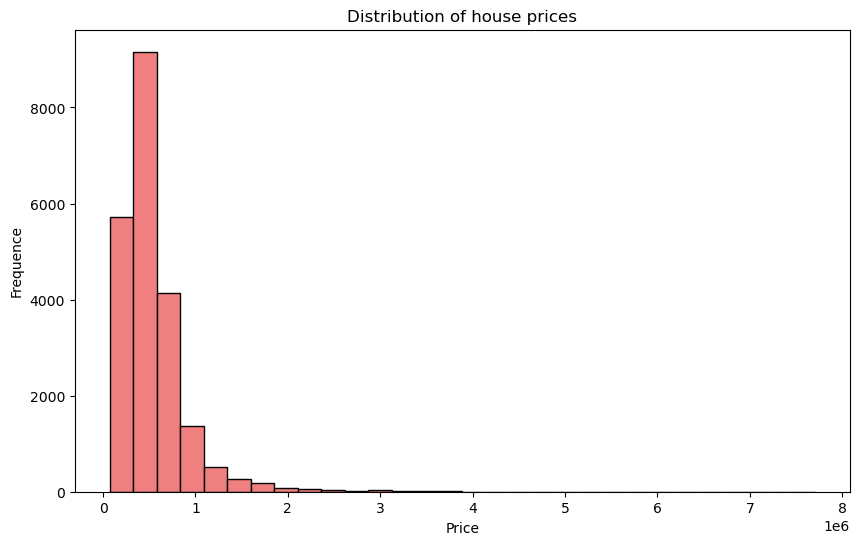

In [256]:
# Price distribution

plt.figure(figsize=(10,6))
plt.hist(housing_data['price'], bins =30, color = 'lightcoral',edgecolor = 'black')
plt.title('Distribution of house prices')
plt.xlabel('Price')
plt.ylabel('Frequence')
plt.show()

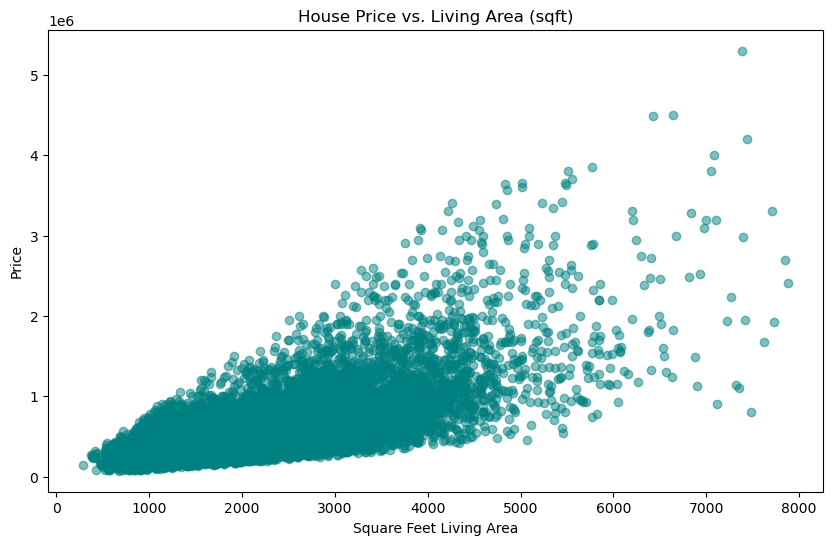

In [17]:
# squarefoot analysis
# sqft_living is given less than 8000 to avoid outlayers
housing_data = housing_data[housing_data['sqft_living']< 8000]
plt.figure(figsize=(10, 6))

plt.scatter(housing_data['sqft_living'], housing_data['price'], alpha=0.5, color='teal')
plt.title('House Price vs. Living Area (sqft)')
plt.xlabel('Square Feet Living Area')
plt.ylabel('Price')
plt.show()



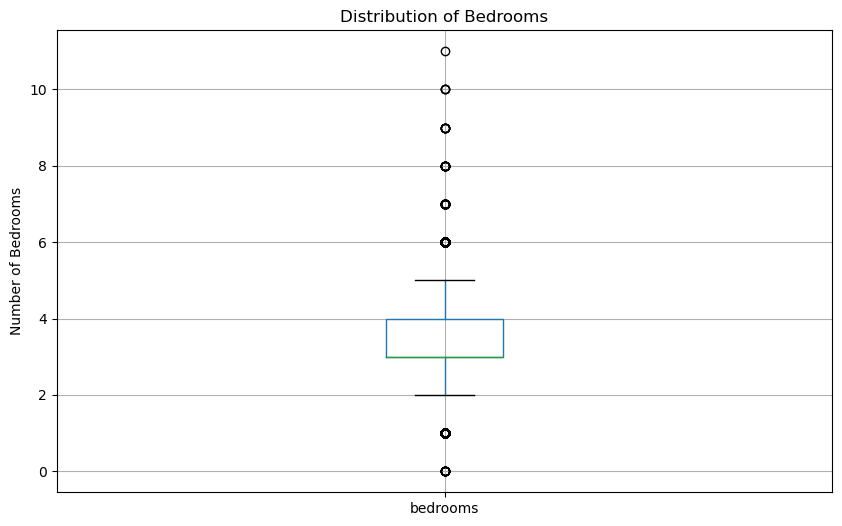

In [39]:
# set bedrooms less than 15 to avoid outlayers
housing_data = housing_data[housing_data['bedrooms']<15]
plt.figure(figsize=(10, 6))
housing_data.boxplot(column='bedrooms')
plt.title('Distribution of Bedrooms')
plt.ylabel('Number of Bedrooms')  # More descriptive label
plt.suptitle('')  # Optional: Removes extra titles
plt.show()

<Figure size 1000x600 with 0 Axes>

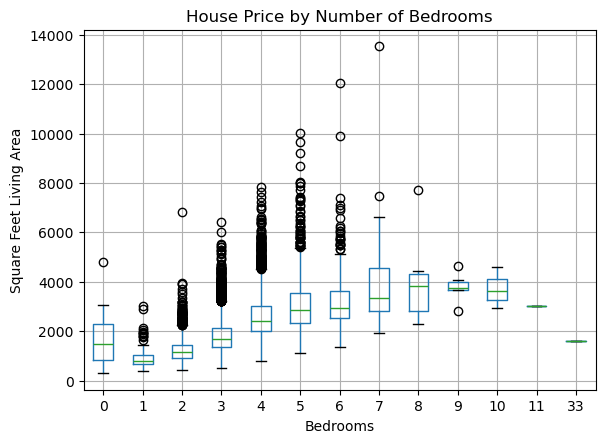

In [278]:
# Box plot for price vs. bedrooms
plt.figure(figsize=(10, 6))
housing_data.boxplot(column='sqft_living', by='bedrooms')
plt.title('House Price by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Square Feet Living Area')
plt.suptitle('')
plt.show()


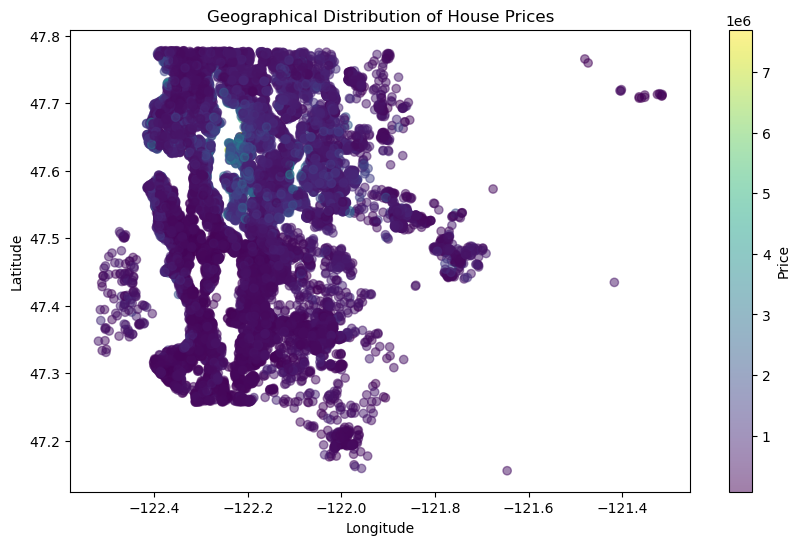

In [304]:
# geological distribution of house prices
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['long'], housing_data['lat'], c=housing_data['price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<Figure size 1000x600 with 0 Axes>

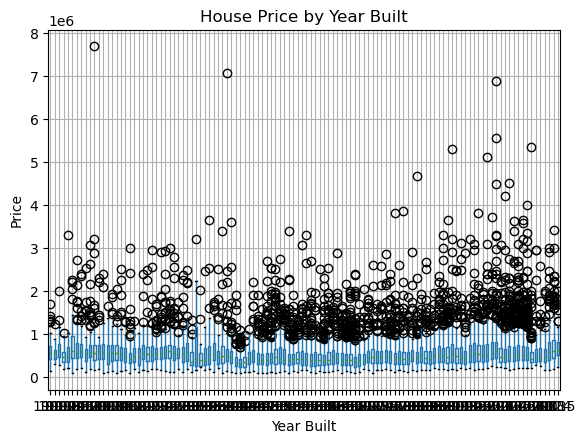

In [350]:
# Box plot of price by year built
plt.figure(figsize=(10, 6))
housing_data.boxplot(column='price', by='yr_built')
plt.title('House Price by Year Built')
plt.xlabel('Year Built')

plt.ylabel('Price')
plt.suptitle('')
plt.show()


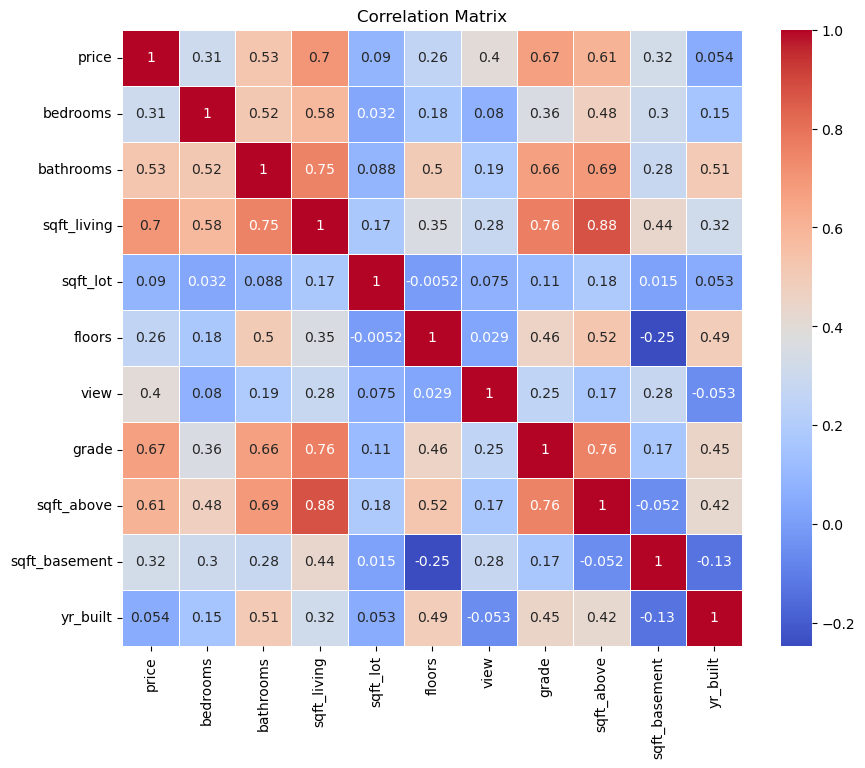

In [346]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = housing_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']].corr()
# heatmap to visualize corelation between different numeric features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
